In [1]:
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import collections
import numpy as np
import nltk
from nltk.corpus import stopwords

In [2]:
try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

url = "https://en.wikipedia.org/wiki/Ozone_layer"

In [3]:
def get_content(article_url):
    request = requests.get(article_url)
    soup = BeautifulSoup(request.text, "html.parser")
    content_div = soup.find("div", class_="mw-content-ltr mw-parser-output", dir="ltr")
    cleaned_text = content_div.get_text(strip=True, separator=' ')
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

content = get_content(url)

In [4]:
def merge_contents(data):
    cleaned_content = re.sub(r'\[\[.*?\]\]|\{.*?\}|<.*?>', '', data)
    return cleaned_content

merge_content = merge_contents(content)

In [5]:
def tokenize(param):
    cleaned_list = re.findall(r'\b\w+\b', param.lower())
    cleaned_list = [word for word in cleaned_list if word.lower() not in stop_words and word.lower() not in ["nm", "bm", "doi",
                                                                                                             "uv", "may", "cfcs",
                                                                                                             "pmid", "also", '10',
                                                                                                             '3', '9', '2', 'c', 'b',
                                                                                                             '5', '2011', '1', 'epa', '100']]
    return cleaned_list

tokens = tokenize(merge_content)

In [6]:
def lower_collection(param):
    text = ''.join(param)
    lowercased_text = text.lower()
    cleaned_list = lowercased_text.split()
    return cleaned_list

lower = lower_collection(tokens)

In [7]:
def count_frequency(collection):
    frequencies = {}
    for word in collection:
        frequencies[word] = frequencies.get(word, 0) + 1
    return frequencies

count = count_frequency(lower)

In [8]:
def print_most_frequent(frequencies, n):
    sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
    top_n_words = sorted_frequencies[:n]
    return top_n_words

print_most_frequent(count, 20)

[('regionstratosphereozoneoxygencycleozonelayerozonelayerozoneshieldregionearthstratosphereabsorbssunultravioletradiationcontainshighconcentrationozonerelationpartsatmospherealthoughstillsmallrelationgasesstratosphereozonelayercontainslesspartspermillionozoneaverageozoneconcentrationearthatmospherewhole0partspermillionozonelayermainlyfoundlowerportionstratosphereapproximately1535kilometers22miearthalthoughthicknessvariesseasonallygeographicallyozonelayerdiscovered1913frenchphysicistscharlesfabryhenribuissonmeasurementssunshowedradiationsentsurfacereachinggroundearthusuallyconsistentspectrumblackbodytemperaturerange5006000k230730exceptradiationwavelength310ultravioletendspectrumdeducedmissingradiationabsorbedsomethingatmosphereeventuallyspectrummissingradiationmatchedoneknownchemicalozonepropertiesexploreddetailbritishmeteorologistgdobsondevelopedsimplespectrophotometerdobsonmetercouldusedmeasurestratosphericozoneground19281958dobsonestablishedworldwidenetworkozonemonitoringstationscont

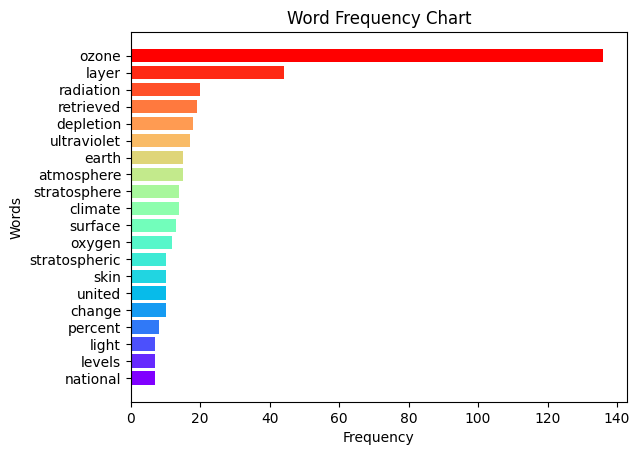

In [9]:
def matplotlib(cleaned_list, top_n):
    top = collections.Counter(cleaned_list)
    sorted_word = sorted(top.items(), key=lambda x: x[1], reverse=True)[:top_n][::-1]
    words, frequencies = zip(*sorted_word)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))

    plt.barh(words, frequencies, color=colors)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Word Frequency Chart')
    plt.show()

matplotlib(tokens, 20)